# **ZOMATO DATA ANALYSIS**

# Step1: Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step2: Extracting data file and creating a dataframe

In [11]:
df = pd.read_csv('Zomatodata.csv')

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Step 3: Data preprocessing and data cleaning

In [19]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [23]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


# Remove denominator from rate column and change it to float data type

In [26]:
def splitRate(value):
    value=str(value).split('/')[0]
    return float(value)

df['rate'] = df['rate'].apply(splitRate)

In [28]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Now the data is preprocessed and cleaned, ready for the analysis.

# Step 4: Exploratory Data Analysis

Q1: What type of restaurant do the majority of customers order from?

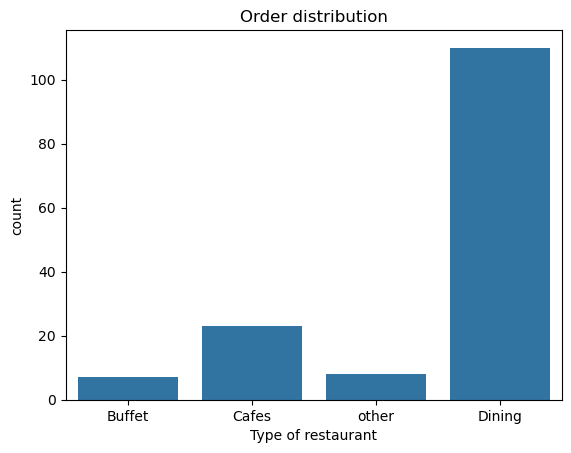

In [38]:
sns.countplot(x='listed_in(type)', data = df)
plt.title('Order distribution')
plt.xlabel('Type of restaurant')
plt.show()

 **Conclusion : The majority of the orders are from dining restaurants.**

Q2: How many votes has each type of restaurant received from customers?

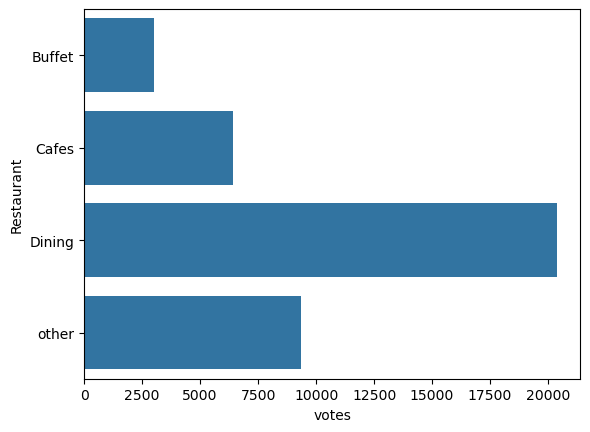

In [53]:
restaurant_votes = df.groupby(['listed_in(type)'], as_index=False)['votes'].sum()
plt.ylabel('Restaurant')
sns.barplot(x = 'votes',y= 'listed_in(type)' ,data = restaurant_votes)
plt.show()

**Conclusion:Vote count distribution shows buffet gets least and dining gets most of the votes.**

Q3: What are the ratings that the majority of restaurants have received?

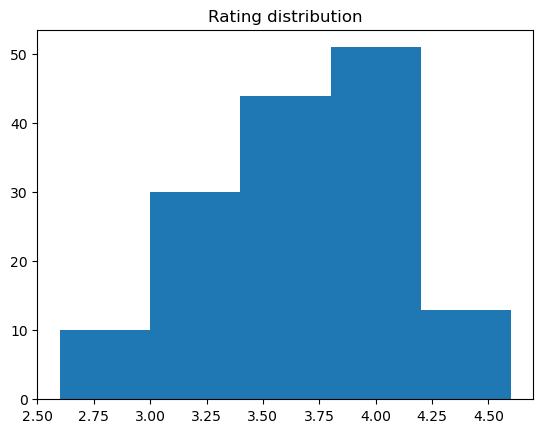

In [58]:
plt.hist(df['rate'],bins=5)
plt.title('Rating distribution')
plt.show()

**Majority of the ratings is from 3.5 to 4.**

Q4:Zomato has observed that most of the couples order most of their food online.What is their average spending on each order?

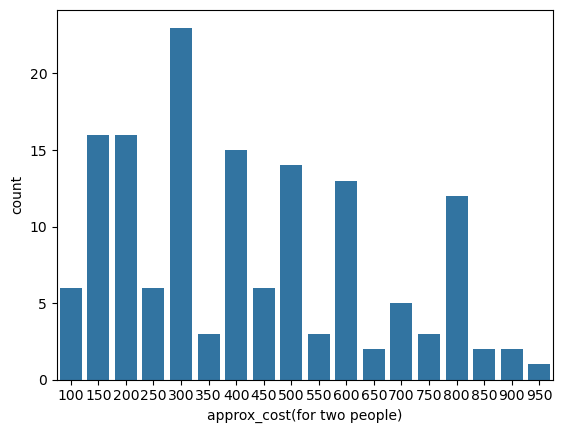

In [79]:
sns.countplot(x = 'approx_cost(for two people)', data = df)
plt.show()

**Conclusion: The majority of couples prefer restaurants with an appropriate spending of 300 rupees.**

Q5: Which mode(offline, online) has received the maximum rating?

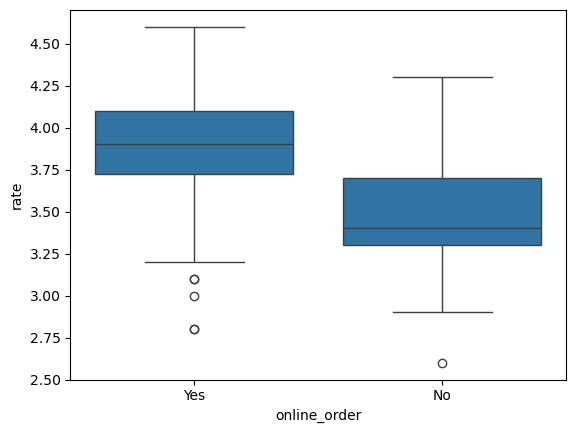

In [81]:
sns.boxplot(x='online_order', y= 'rate', data=df)
plt.show()

**Conclusion: Offline orders received lower ratings as compared to online orders which averages around 4.0 ratings.**

Q6: Which type of restaurant recieved more offline orders, so that Zomato can provide those customers with some good offers?

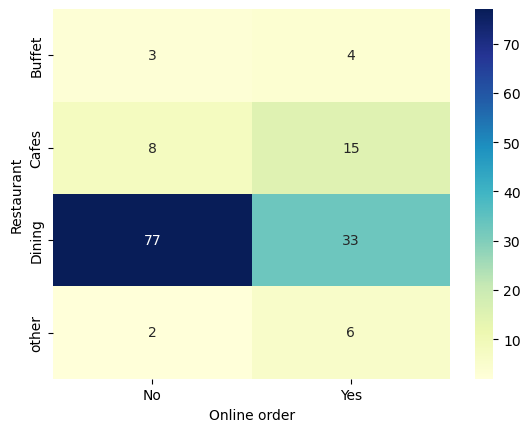

In [101]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value =0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt='d')
plt.xlabel('Online order')
plt.ylabel('Restaurant')
plt.show()

**Conclusion: Dining restaurants primarily accpet offline orders, whereas cafes primarily receive online orders. This suggesrs that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.**